# Validation 
### <i> User generated validation dataset assessment

In [1]:
import pandas as pd
import pickle
from numpy import nan
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc

In [2]:
#pull in validation dataset
outvalid = pd.read_csv('test_data/validation_done_mainsmore.csv')
#This data was generated with the help of some very kind friends who tagged 500 ingredients as either good or bad replacements

In [3]:
outvalid

,title,OG Ingredient,Swapped Ingredient,aisle,Cosine Sim,good?
0,Italian-Style Eggplant Parmesan (Melanzane all...,vegetable oil,olive oil,"oil, vinegar, salad dressing",0.218312,yes
1,Italian-Style Eggplant Parmesan (Melanzane all...,eggplant,parsley,produce,0.078925,no
2,Italian-Style Eggplant Parmesan (Melanzane all...,mozzarella,cheese,cheese,0.218312,yes
3,"Easy Chicken, Kale and Goat Cheese Enchiladas",avocado oil,olive oil,"oil, vinegar, salad dressing",0.192600,yes
4,"Slow Cooker Chicken with Rosemary, Apples and ...",apple,leaf lard,produce,0.134471,no
...,...,...,...,...,...,...
895,Almond & Herb Crusted Salmon,juice lemon,arugula,produce,0.146662,NaN
896,Mexican Street Corn Tostadas,bean,corn,produce,0.031119,NaN
897,Mexican Street Corn Tostadas,vegetable oil,olive oil,"oil, vinegar, salad dressing",0.133223,NaN
898,Mexican Street Corn Tostadas,juice lime,cilantro,produce,0.114483,NaN


In [4]:
#output some facts
allmat = outvalid[outvalid['good?'].notnull()]
print(f'All matrix is {allmat.shape}')
print(f'Average recipe similarity is {allmat["Cosine Sim"].mean()} +- {allmat["Cosine Sim"].std()}, median is {allmat["Cosine Sim"].median()} ')
print('\n')

good = allmat[allmat['good?'].str.match('yes', na=False)]
print(f'Good matrix is {good.shape}')
print(f'Average recipe similarity of good replacements is {good["Cosine Sim"].mean()} +- {good["Cosine Sim"].std()}, median is {good["Cosine Sim"].median()}')
print('\n')

bad = allmat[allmat['good?'].str.match('no', na=False)]
print(f'Bad matrix is {bad.shape}')
print(f'Average recipe similarity of bad replacements is {bad["Cosine Sim"].mean()} +- {bad["Cosine Sim"].std()}, median is {bad["Cosine Sim"].median()}')


All matrix is (499, 6)
Average recipe similarity is 0.2112173556838517 +- 0.12511720770541934, median is 0.1814611237 


Good matrix is (203, 6)
Average recipe similarity of good replacements is 0.2569460674105911 +- 0.13147586094558553, median is 0.24420973199999998


Bad matrix is (294, 6)
Average recipe similarity of bad replacements is 0.17889501987038095 +- 0.11004629166730048, median is 0.1502419855


In [5]:
#generate some statistics
threshold = np.arange(0.01, 0.72, 0.01)
results = pd.DataFrame()


for i, cutoff in enumerate(threshold):
    results.loc[i, 'threshold'] =  cutoff
    
    #elements on confusion matrix
    results.loc[i, 'TP'] = len(good[good["Cosine Sim"] >= cutoff])
    results.loc[i, 'FP'] = len(bad[bad["Cosine Sim"] >= cutoff])
    results.loc[i, 'TN'] = len(bad[bad["Cosine Sim"] <= cutoff])
    results.loc[i, 'FN'] = len(good[good["Cosine Sim"] <= cutoff])
    
    # precision and recall
    results.loc[i, 'recall'] = results.loc[i, 'TP'] / (results.loc[i, 'TP'] + results.loc[i, 'FN'] )
    results.loc[i, 'precision'] = results.loc[i, 'TP'] / ( results.loc[i, 'TP'] + results.loc[i, 'FP'] )
    
    #ROC
    results.loc[i, 'f1'] = 2 * (results.loc[i, 'precision'] * results.loc[i, 'recall']) / (results.loc[i, 'precision'] + results.loc[i, 'recall'])
    results.loc[i, 'TPR'] = results.loc[i, 'TP'] / (results.loc[i, 'TP'] + results.loc[i, 'FN'] )
    results.loc[i, 'FPR'] = results.loc[i, 'FP'] / (results.loc[i, 'FP'] + results.loc[i, 'TN'] )
 

In [6]:
results

,threshold,TP,FP,TN,FN,recall,precision,f1,TPR,FPR
0,0.01,203.0,291.0,3.0,0.0,1.000000,0.410931,0.582496,1.000000,0.989796
1,0.02,202.0,290.0,4.0,1.0,0.995074,0.410569,0.581295,0.995074,0.986395
2,0.03,201.0,288.0,6.0,2.0,0.990148,0.411043,0.580925,0.990148,0.979592
3,0.04,201.0,287.0,7.0,2.0,0.990148,0.411885,0.581766,0.990148,0.976190
4,0.05,199.0,283.0,11.0,4.0,0.980296,0.412863,0.581022,0.980296,0.962585
...,...,...,...,...,...,...,...,...,...,...
66,0.67,2.0,0.0,294.0,201.0,0.009852,1.000000,0.019512,0.009852,0.000000
67,0.68,2.0,0.0,294.0,201.0,0.009852,1.000000,0.019512,0.009852,0.000000
68,0.69,2.0,0.0,294.0,201.0,0.009852,1.000000,0.019512,0.009852,0.000000
69,0.70,2.0,0.0,294.0,201.0,0.009852,1.000000,0.019512,0.009852,0.000000


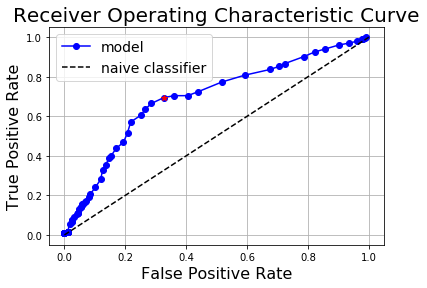

In [7]:
#ROC plot
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in results['threshold']]
plt.plot(results['FPR'], results['TPR'], 'bo-', label = 'model');
plt.plot(list(np.linspace(0, 1, num = len(threshold))), list(np.linspace(0, 1, num = len(threshold))), 'k--', label = 'naive classifier');


plt.legend(prop={'size':14})
plt.ylabel('True Positive Rate', size = 16); plt.xlabel('False Positive Rate', size = 16);
plt.title('Receiver Operating Characteristic Curve', size = 20);
best = results[['f1']].idxmax()
plt.grid(True)
plt.plot(results.loc[best[0], 'FPR'], results.loc[best[0], 'TPR'], '*r')

In [8]:
results.loc[best]

,threshold,TP,FP,TN,FN,recall,precision,f1,TPR,FPR
18,0.19,141.0,96.0,198.0,62.0,0.694581,0.594937,0.640909,0.694581,0.326531


In [9]:
theauc = auc(results['FPR'].to_numpy(), results['TPR'].to_numpy())
print(f'Area under curve: {theauc}')

Area under curve: 0.6850976843939546
